In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
def pre_lbp(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rows, cols = gray.shape[0], gray.shape[1]
    pre_lbp = np.zeros((rows, cols), dtype=np.uint8)  
    return gray, rows, cols, pre_lbp


def calculate_lbp_clockwise(image):
    gray, rows, cols, lbp_clockwise = pre_lbp(image)
    for i in range(1, rows - 1):  # Hindari satu piksel di tepi atas dan bawah
        for j in range(1, cols - 1):  # Hindari satu piksel di tepi kiri dan kanan
            center = gray[i, j]
            code = 0
            
            # Tetangga dalam urutan searah jarum jam mulai dari 3 o'clock
            neighbors = [gray[i - 1, j], gray[i - 1, j + 1], gray[i, j + 1],
                         gray[i + 1, j + 1], gray[i + 1, j], gray[i + 1, j - 1],
                         gray[i, j - 1], gray[i - 1, j - 1]]
            
            # Hitung perbedaan antara piksel tetangga dan piksel pusat
            for k in range(8):
                if neighbors[k] >= center:
                    code |= (1 << k)
            
            lbp_clockwise[i - 1, j - 1] = code
    return lbp_clockwise

def calculate_lbp_anticlockwise(image):
    gray, rows, cols, lbp_anticlockwise = pre_lbp(image)
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            center = gray[i, j]
            code = 0
            
            # Tetangga dalam urutan berlawanan arah jarum jam mulai dari 9 o'clock
            neighbors = [gray[i - 1, j - 1], gray[i - 1, j], gray[i - 1, j + 1],
                         gray[i, j + 1], gray[i + 1, j + 1], gray[i + 1, j], gray[i + 1, j - 1],
                         gray[i, j - 1]]
            
            # Hitung perbedaan antara piksel tetangga dan piksel pusat
            for k in range(8):
                if neighbors[k] >= center:
                    code |= (1 << k)
            
            lbp_anticlockwise[i - 1, j - 1] = code
    
    return lbp_anticlockwise

    
def calculate_ncdblbp_clockwise(image):
    gray, rows, cols, ncdlbp_clockwise = pre_lbp(image)
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            center = gray[i, j]
            code = 0
            
            # Tetangga dalam urutan searah jarum jam mulai dari 3 o'clock
            neighbors = [gray[i - 1, j], gray[i - 1, j + 1], gray[i, j + 1],
                         gray[i + 1, j + 1], gray[i + 1, j], gray[i + 1, j - 1],
                         gray[i, j - 1], gray[i - 1, j - 1]]
            
            # Hitung perbedaan antara piksel tetangga dan piksel pusat
            for k in range(8):
                if neighbors[k] >= center:
                    code |= (1 << k)
            
            ncdlbp_clockwise[i, j] = code
    
    return ncdlbp_clockwise


def calculate_ncdblbp_anticlockwise(image):
    gray, rows, cols, ncdlbp_anticlockwise = pre_lbp(image)
    
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            center = gray[i, j]
            code = 0
            
            # Tetangga dalam urutan berlawanan arah jarum jam mulai dari 9 o'clock
            neighbors = [gray[i - 1, j], gray[i - 1, j - 1], gray[i, j - 1],
                         gray[i + 1, j - 1], gray[i + 1, j], gray[i + 1, j + 1],
                         gray[i, j + 1], gray[i - 1, j + 1]]
            
            # Hitung perbedaan antara piksel tetangga dan piksel pusat
            for k in range(8):
                if neighbors[k] >= center:
                    code |= (1 << k)
                #     print(neighbors[k], center)
                # print(neighbors[k], center)
            # print(code)
            ncdlbp_anticlockwise[i, j] = code
    
    return ncdlbp_anticlockwise


In [25]:
# Load gambar
image_path = 'img.jpg'
image = cv2.imread(image_path)

In [40]:
cv2.destroyAllWindows()

In [3]:


# Hitung hasil LBP
lbpac = calculate_lbp_anticlockwise(image)
lbpc = calculate_lbp_clockwise(image)

# Hitung hasil NCD-LBP
ncdac = calculate_ncdblbp_anticlockwise(image)
ncdc = calculate_ncdblbp_clockwise(image)

print(f'LBP\n==> AC: \n{lbpac}')
print(f'\n==> C: \n{lbpc}')

print(f'\n\nNCD-LBP\n==> AC: \n{ncdac}')
print(f'\n==> C: \n{ncdc}')


LBP
==> AC: 
[[104   0 199 ...   6   0   0]
 [164 195 247 ...   6   0   0]
 [ 97 243 225 ...  31   0   0]
 ...
 [ 62  71 131 ...  63   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]

==> C: 
[[ 52   0 227 ...   3   0   0]
 [ 82 225 251 ...   3   0   0]
 [176 249 240 ... 143   0   0]
 ...
 [ 31 163 193 ... 159   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


NCD-LBP
==> AC: 
[[  0   0   0 ...   0   0   0]
 [  0  88   0 ... 249 129   0]
 [  0 148  15 ... 196 129   0]
 ...
 [  0   0 197 ...   1 247   0]
 [  0 241 139 ... 255 243   0]
 [  0   0   0 ...   0   0   0]]

==> C: 
[[  0   0   0 ...   0   0   0]
 [  0  52   0 ...  63   3   0]
 [  0  82 225 ...  70   3   0]
 ...
 [  0   0  71 ...   1 223   0]
 [  0  31 163 ... 255 159   0]
 [  0   0   0 ...   0   0   0]]


In [4]:
import sys
np.set_printoptions(threshold=sys.maxsize)

flatcoi = ncdac.flatten()
print(len(flatcoi))
flatcoi = flatcoi.astype(object)
print(np.insert(flatcoi, 0, 'hohoi'))
print(len(np.insert(flatcoi, 0, 99)))

12596
['hohoi' 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 88 0 143 199 131 151
 207 135 39 255 255 255 0 167 247 251 240 192 64 0 4 196 64 0 15 6 15 158
 239 227 193 195 199 195 195 195 7 199 193 3 63 222 237 0 126 24 62 126 24
 237 224 224 225 225 16 14 14 15 15 103 150 239 215 104 16 255 235 115 240
 128 5 231 240 145 159 15 255 112 184 157 111 98 0 4 62 62 60 254 248 249
 249 129 0 0 148 15 191 255 235 18 255 255 75 0 4 255 191 255 240 240 240
 249 251 131 135 199 195 3 207 3 7 14 255 201 225 195 195 195 195 195 163
 255 255 19 30 12 207 1 54 28 62 28 12 223 227 225 225 225 0 15 15 15 239
 215 0 255 144 255 0 190 255 248 192 129 239 243 208 0 7 55 254 80 0 30
 255 195 129 39 118 48 28 12 12 68 196 129 0 0 26 63 30 28 237 16 94 12
 255 255 255 255 80 236 192 224 96 16 188 159 191 191 255 3 135 231 3 47
 30 221 239 193 195 135 239 243 115

In [5]:
images = ['img.jpg', 'resized_16.jpg', 'resized_32.jpg', 'resized_64.jpg', 'resized_128.jpg', "02.jpg", "32angry.jpg"]
lbp_images = {}

for image_path in images:
    image = cv2.imread(image_path)
    
    # Hitung hasil LBP
    lbpac = calculate_lbp_anticlockwise(image)
    lbpc = calculate_lbp_clockwise(image)

    # Hitung hasil NCD-LBP
    ncdac = calculate_ncdblbp_anticlockwise(image)
    ncdc = calculate_ncdblbp_clockwise(image)

    # Simpan hasil perhitungan ke dalam kamus dengan nama file sebagai kunci
    lbp_images[image_path] = {
        "lbpac": lbpac,
        "lbpc": lbpc,
        "ncdac": ncdac,
        "ncdc": ncdc
    }

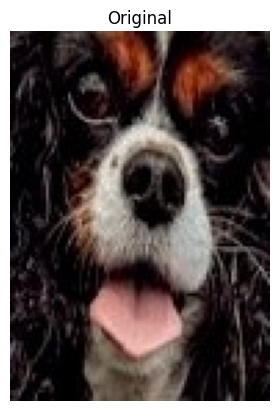

In [6]:
# Baca gambar menggunakan OpenCV
image = cv2.imread('./img.jpg')

# Tampilkan gambar menggunakan Matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Ubah format warna dari BGR ke RGB
plt.title('Original')  # Tambahkan judul jika perlu
plt.axis('off')  # Hilangkan sumbu x dan y jika tidak diperlukan
plt.show()  # Tampilkan gambar

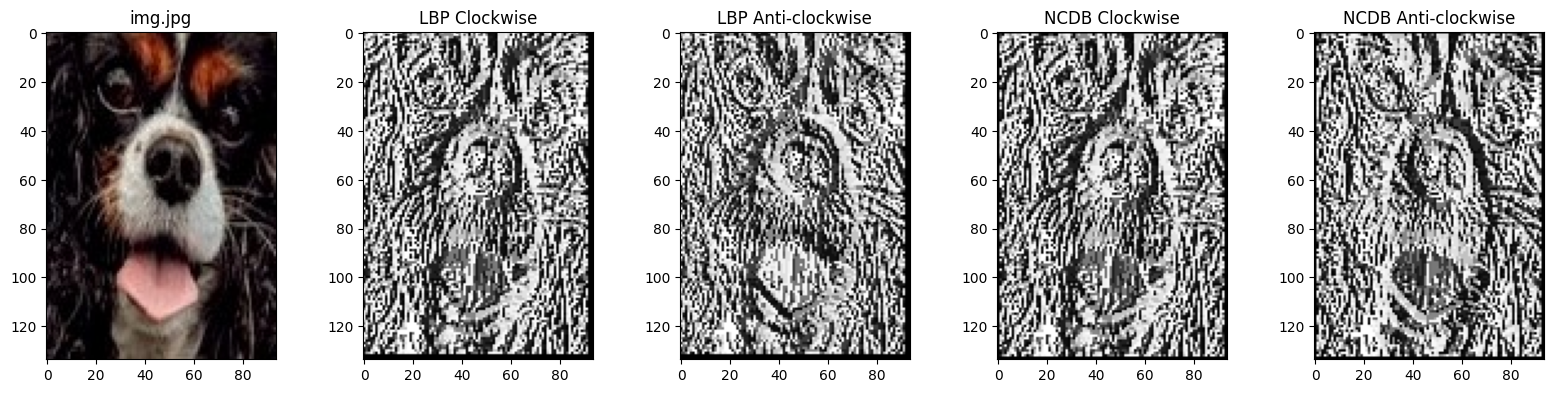

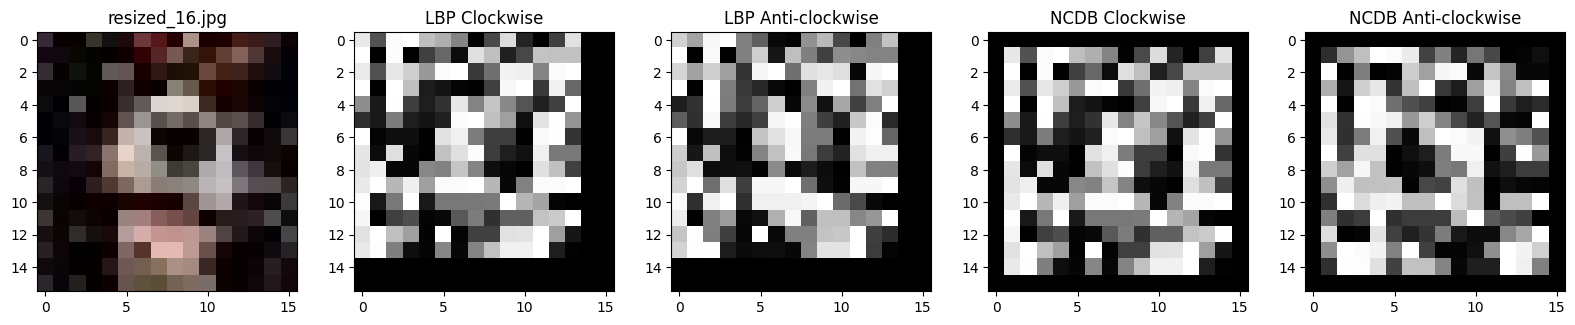

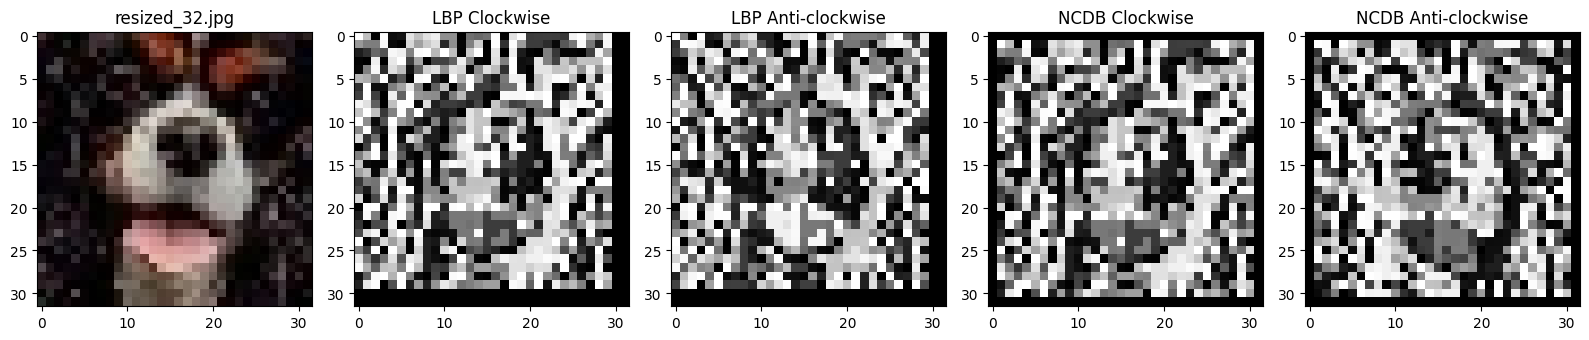

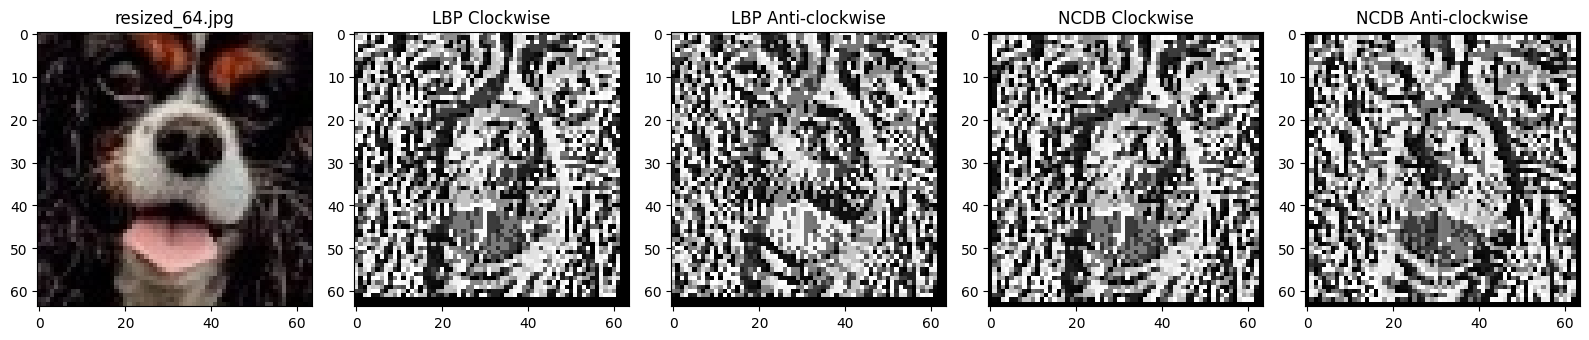

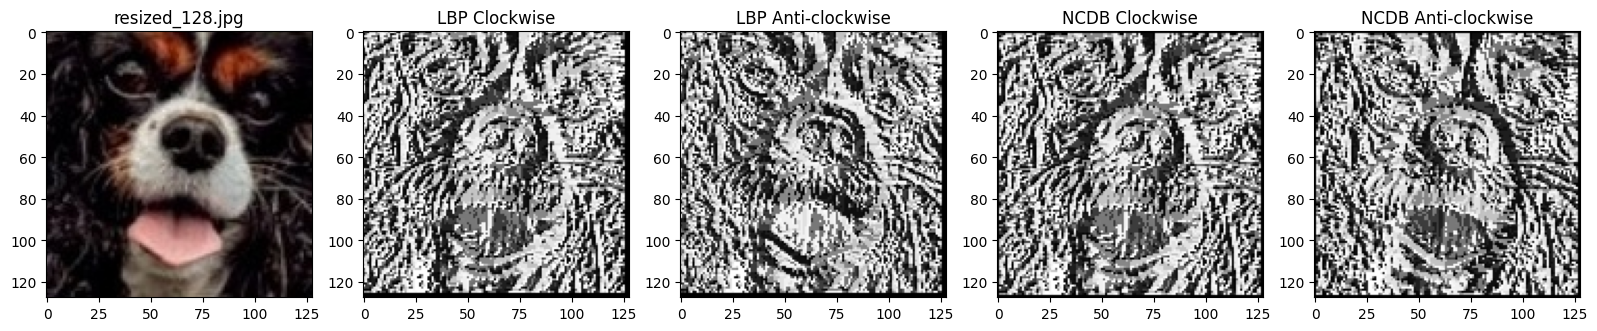

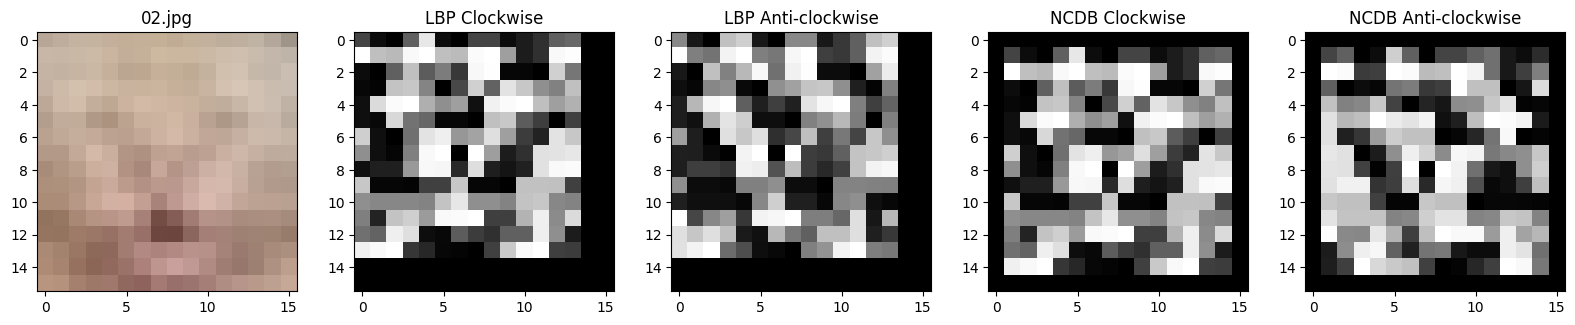

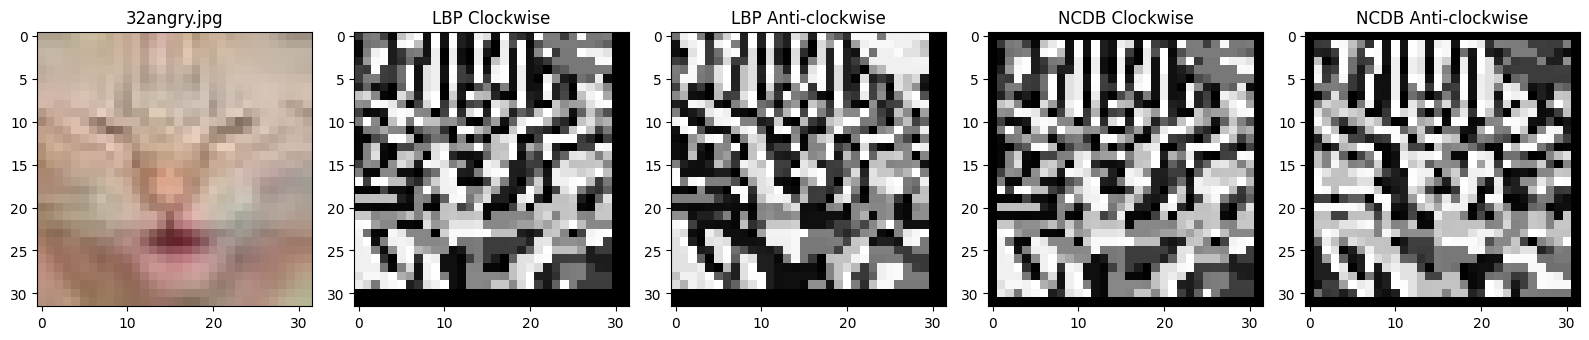

In [7]:
for image in lbp_images.keys():
    res = image

    # Menampilkan gambar dalam grid 1 baris dan 3 kolom
    plt.figure(figsize=(16, 4))

    # Original Image
    plt.subplot(1, 5, 1)
    image_read = cv2.imread(f"./{res}")
    plt.imshow(cv2.cvtColor(image_read, cv2.COLOR_BGR2RGB))
    plt.title(f'{res}')

    # Clockwise Result
    plt.subplot(1, 5, 2)
    plt.imshow(cv2.cvtColor(lbp_images[res]["lbpc"], cv2.COLOR_BGR2RGB))
    plt.title('LBP Clockwise')

    # Anti-clockwise Result
    plt.subplot(1, 5, 3)
    plt.imshow(cv2.cvtColor(lbp_images[res]["lbpac"], cv2.COLOR_BGR2RGB))
    plt.title('LBP Anti-clockwise')

    # Clockwise Result
    plt.subplot(1, 5, 4)
    plt.imshow(cv2.cvtColor(lbp_images[res]["ncdc"], cv2.COLOR_BGR2RGB))
    plt.title('NCDB Clockwise')

    # Anti-clockwise Result
    plt.subplot(1, 5, 5)
    plt.imshow(cv2.cvtColor(lbp_images[res]["ncdac"], cv2.COLOR_BGR2RGB))
    plt.title('NCDB Anti-clockwise')

    plt.tight_layout()
    plt.show()

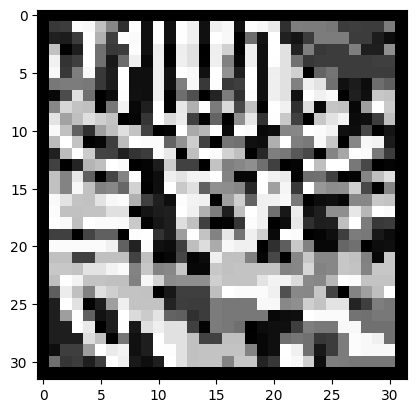

In [8]:
plt.imshow(lbp_images[res]["ncdac"], cmap='gray', vmin=0, vmax=255)


In [9]:
lbp_images[res]["ncdac"].shape

(32, 32)

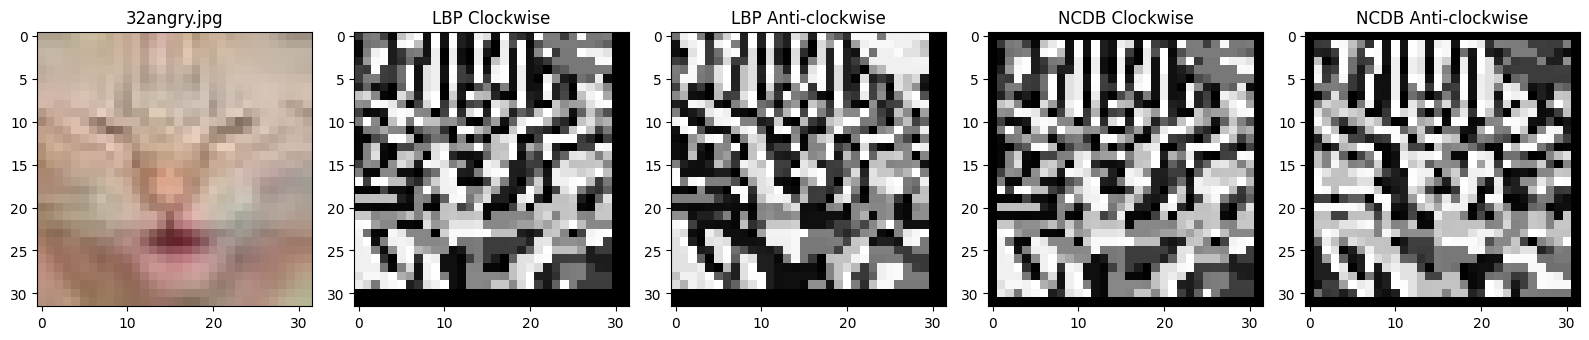

In [10]:

# Menampilkan gambar dalam grid 1 baris dan 3 kolom
plt.figure(figsize=(16, 4))

# Original Image
plt.subplot(1, 5, 1)
image_read = cv2.imread(f"./{res}")
plt.imshow(cv2.cvtColor(image_read, cv2.COLOR_BGR2RGB))
plt.title(f'{res}')

# Clockwise Result
plt.subplot(1, 5, 2)
plt.imshow(cv2.cvtColor(lbp_images[res]["lbpc"], cv2.COLOR_BGR2RGB))
plt.title('LBP Clockwise')

# Anti-clockwise Result
plt.subplot(1, 5, 3)
plt.imshow(cv2.cvtColor(lbp_images[res]["lbpac"], cv2.COLOR_BGR2RGB))
plt.title('LBP Anti-clockwise')

# Clockwise Result
plt.subplot(1, 5, 4)
plt.imshow(cv2.cvtColor(lbp_images[res]["ncdc"], cv2.COLOR_BGR2RGB))
plt.title('NCDB Clockwise')

# Anti-clockwise Result
plt.subplot(1, 5, 5)
plt.imshow(cv2.cvtColor(lbp_images[res]["ncdac"], cv2.COLOR_BGR2RGB))
plt.title('NCDB Anti-clockwise')

plt.tight_layout()
plt.show()

In [11]:
df_ncdc = pd.DataFrame(ncdc)
df_ncdac = pd.DataFrame(ncdac)

df_ncdc.to_csv('ncdc.csv')
df_ncdac.to_csv('ncdac.csv')

df_ncdac.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,56,60,252,249,193,135,47,254,16,...,126,124,124,120,60,62,60,60,124,0
2,0,32,28,60,252,177,63,255,250,16,...,20,60,124,124,124,60,60,28,12,0
3,0,193,2,30,254,112,56,60,252,16,...,34,126,56,60,60,127,30,30,143,0
4,0,241,51,63,254,112,24,108,240,8,...,113,56,60,60,60,60,60,63,63,0


In [12]:
df_lbpc = pd.DataFrame(lbpc)
df_lbpac = pd.DataFrame(lbpac)

df_lbpc.to_csv('lbpc.csv')
df_lbpac.to_csv('lbpac.csv')

df_lbpac.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,112,240,252,126,14,135,211,253,32,253,...,248,248,120,240,241,240,240,248,0,0
1,16,224,240,252,54,243,255,125,32,253,...,240,248,248,248,240,240,224,192,0,0
2,14,1,225,253,56,112,240,252,32,221,...,249,112,240,240,251,225,225,199,0,0
3,62,51,243,253,56,96,216,60,64,223,...,112,240,240,240,240,240,243,243,0,0
4,124,112,249,124,112,226,255,32,195,223,...,0,152,184,240,240,240,240,240,0,0


error: OpenCV(4.8.1) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


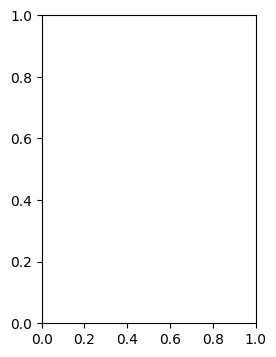

In [13]:
# Menampilkan gambar dalam grid 1 baris dan 3 kolom
plt.figure(figsize=(16, 4))

# Original Image
plt.subplot(1, 5, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original')

# Clockwise Result
plt.subplot(1, 5, 2)
plt.imshow(cv2.cvtColor(lbpc, cv2.COLOR_BGR2RGB))
plt.title('LBP Clockwise')

# Anti-clockwise Result
plt.subplot(1, 5, 3)
plt.imshow(cv2.cvtColor(lbpac, cv2.COLOR_BGR2RGB))
plt.title('LBP Anti-clockwise')

# Clockwise Result
plt.subplot(1, 5, 4)
plt.imshow(cv2.cvtColor(ncdc, cv2.COLOR_BGR2RGB))
plt.title('NCDB Clockwise')

# Anti-clockwise Result
plt.subplot(1, 5, 5)
plt.imshow(cv2.cvtColor(ncdac, cv2.COLOR_BGR2RGB))
plt.title('NCDB Anti-clockwise')

plt.tight_layout()
plt.show()

error: OpenCV(4.8.1) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


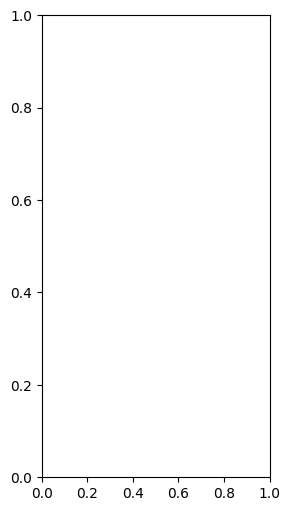

In [ ]:
# Menampilkan gambar dalam grid 1 baris dan 3 kolom
plt.figure(figsize=(10, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original')

# Clockwise Result
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(ncdc, cv2.COLOR_BGR2RGB))
plt.title('Clockwise')

# Anti-clockwise Result
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(ncdac, cv2.COLOR_BGR2RGB))
plt.title('Anti-clockwise')

plt.tight_layout()
plt.show()